50


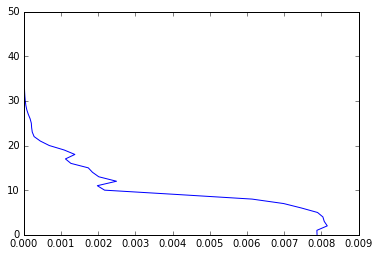

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'

dataset = netCDF4.Dataset(WRFOUT_FILE_PATH, 'r')



# 3D mositure - QVAPOR
QVAPOR_var = dataset.variables['QVAPOR']

# Read the data into a NumPy array
QVAPOR = QVAPOR_var[:]

LAT_INDEX =48 # This is the south_north dimension in the NetCDF file
LON_INDEX=30 # This is the west-east dimension in the NetCDF File

# How many levels are there ? Use the bottom_top dimension
num_levels = dataset.dimensions['bottom_top'].size
print(str(num_levels))

levels = np.arange(num_levels)
plt.plot(QVAPOR[0,:,LAT_INDEX,LON_INDEX], levels)
# print("The description: " + str(QVAPOR_var.description)) 
# print("The units: " + str(QVAPOR_var.units))
# print("The dimensions: " + str(QVAPOR_var.dimensions))
# LEVEL = 3
# plt.contourf(QVAPOR_var[0, 30, :, :])
# plt.colorbar()
plt.show()


dataset.close()